### Actual Tensorflow Intro

Tensorflow is a deep learning library, developed by google, that allows us to create fairly complicated models with little coding

In [ ]:
# import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


#### Data generation
We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often:

 - you are given some data (csv, database, etc.)
 - you preprocess it into a desired format (later on we will see methods for preprocesing)
 - you save it into npz files (if you're working in Python) to access later
Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [ ]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low = -10 , high = 10, size = (observations,1))
zs = np.random.uniform(low = -10 , high = 10, size = (observations,1))


# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two matrices (vectors) into one.
generated_inputs = np.column_stack((xs,zs))


# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1,1,(observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# numpy.savez() Save several arrays into a single file in uncompressed .npz format.
# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [ ]:
targets = generated_targets

### Solving with tensorflow

In [ ]:
#Loading training data
training_data = np.load('TF_intro.npz')

In [ ]:
# Declare a variable where we will store the input size of our model
# It should be equal to the number of variables you have
input_size = 2

# Declare the output size of the model
# It should be equal to the number of outputs you've got (for regressions that's usually 1)
output_size  = 1

# tf.keras.sequential funtions that specifies how the model will be laid down('stack layers')
model = tf.keras.Sequential([
                          tf.keras.layers.Dense(output_size)
 ])
# model.compile(optimizer,loss) configures the model for training
model.compile(optimizer = 'sgd',loss = 'mean_squared_error') 

# model.fit(inputs,targets) fit(train) the model
# epochs = iteration over the full dataset # if they are not otherwise specified the number of epochs will be 1 
# (a single epoch of training)
# verbose = '0', stands for 'silent' or no output about the training is displayed
# verbose  = '1', stands for 'progress bar'
# verbose = '2', stands for 'one line per epoch'
model.fit( training_data['inputs'], training_data['targets'],epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 2s - loss: 30.1680
Epoch 2/100
32/32 - 0s - loss: 4.5173
Epoch 3/100
32/32 - 0s - loss: 1.4757
Epoch 4/100
32/32 - 0s - loss: 0.6497
Epoch 5/100
32/32 - 0s - loss: 0.4384
Epoch 6/100
32/32 - 0s - loss: 0.3727
Epoch 7/100
32/32 - 0s - loss: 0.3667
Epoch 8/100
32/32 - 0s - loss: 0.3453
Epoch 9/100
32/32 - 0s - loss: 0.3544
Epoch 10/100
32/32 - 0s - loss: 0.3430
Epoch 11/100
32/32 - 0s - loss: 0.3446
Epoch 12/100
32/32 - 0s - loss: 0.3479
Epoch 13/100
32/32 - 0s - loss: 0.3594
Epoch 14/100
32/32 - 0s - loss: 0.3460
Epoch 15/100
32/32 - 0s - loss: 0.3524
Epoch 16/100
32/32 - 0s - loss: 0.3479
Epoch 17/100
32/32 - 0s - loss: 0.3474
Epoch 18/100
32/32 - 0s - loss: 0.3479
Epoch 19/100
32/32 - 0s - loss: 0.3496
Epoch 20/100
32/32 - 0s - loss: 0.3579
Epoch 21/100
32/32 - 0s - loss: 0.3485
Epoch 22/100
32/32 - 0s - loss: 0.3632
Epoch 23/100
32/32 - 0s - loss: 0.3461
Epoch 24/100
32/32 - 0s - loss: 0.3449
Epoch 25/100
32/32 - 0s - loss: 0.3509
Epoch 26/100
32/32 - 0s - loss: 0

### Extract the weight and bias

Extracting the weight(s) and bias(es) of a model is not an essential step for the machine learning process. In fact, usually they would not tell us much in a deep learning context. However, this simple example was set up in a way, which allows us to verify if the answers we get are correct.

In [ ]:
# model.layer.get_weights()  – This function returns a list consisting of NumPy arrays. The first array gives the weights
# of the layer and the second array gives the biases
model.layers[0].get_weights()

[array([[ 2.0029302],
        [-2.9943829]], dtype=float32),
 array([5.00247], dtype=float32)]

In [ ]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0029302],
       [-2.9943829]], dtype=float32)

In [ ]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
bias

array([5.00247], dtype=float32)

### Extracts the output(make predictions)

Once more, this is not an essential step, however, we usually want to be able to make predictions.

In [ ]:
# model.predict_on_batch(data) calculates the output given inputs
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
model.predict_on_batch(training_data['inputs'])

array([[-27.352137  ],
       [ 29.473932  ],
       [ 29.988962  ],
       [ -3.7653074 ],
       [ 30.909248  ],
       [-34.190285  ],
       [-30.726095  ],
       [ 34.560898  ],
       [-25.570948  ],
       [ 20.517237  ],
       [-29.922014  ],
       [ 37.243652  ],
       [  6.7362375 ],
       [-21.154963  ],
       [ 38.52292   ],
       [  0.06865501],
       [ 21.903719  ],
       [ -1.5913243 ],
       [-35.363724  ],
       [ 41.82328   ],
       [ 27.998703  ],
       [ 24.655304  ],
       [  1.6071234 ],
       [ -6.0124636 ],
       [  3.51257   ],
       [ 32.282265  ],
       [ 19.024178  ],
       [-20.709232  ],
       [ 36.134544  ],
       [ 19.391838  ],
       [-21.255074  ],
       [ -7.478118  ],
       [ 41.288406  ],
       [ 16.597847  ],
       [-28.46604   ],
       [ 26.881529  ],
       [  4.284872  ],
       [ 25.168982  ],
       [  2.2779245 ],
       [  3.2844832 ],
       [ -5.9296007 ],
       [ 31.31688   ],
       [  3.1724548 ],
       [ -1

In [ ]:
# model.predict_on_batch(data) calculates the output given inputs
# If we display our targets (actual observed values), we can manually compare the outputs and the targets
model.predict_on_batch(training_data['inputs']).round(1)

array([[-27.4],
       [ 29.5],
       [ 30. ],
       [ -3.8],
       [ 30.9],
       [-34.2],
       [-30.7],
       [ 34.6],
       [-25.6],
       [ 20.5],
       [-29.9],
       [ 37.2],
       [  6.7],
       [-21.2],
       [ 38.5],
       [  0.1],
       [ 21.9],
       [ -1.6],
       [-35.4],
       [ 41.8],
       [ 28. ],
       [ 24.7],
       [  1.6],
       [ -6. ],
       [  3.5],
       [ 32.3],
       [ 19. ],
       [-20.7],
       [ 36.1],
       [ 19.4],
       [-21.3],
       [ -7.5],
       [ 41.3],
       [ 16.6],
       [-28.5],
       [ 26.9],
       [  4.3],
       [ 25.2],
       [  2.3],
       [  3.3],
       [ -5.9],
       [ 31.3],
       [  3.2],
       [ -1.6],
       [-29.5],
       [-16.7],
       [ 32. ],
       [  9.8],
       [ 29.4],
       [ -0.9],
       [-15. ],
       [ -9.8],
       [ -6.4],
       [ 36.5],
       [  5.1],
       [ -6. ],
       [ 34.8],
       [ -1.2],
       [  0.2],
       [ 20. ],
       [ 22.9],
       [-12.4],
       [

In [ ]:
# model.predict_on_batch(data) calculates the output given inputs
training_data['inputs'].round(1)

array([[-2.5,  9.2],
       [ 1. , -7.5],
       [ 4.7, -5.2],
       ...,
       [ 9.1, -7.1],
       [ 7.7,  3.4],
       [ 7.8,  0.7]])

### Plotting the data

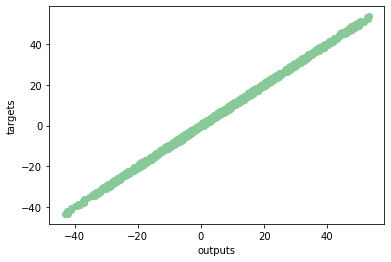

In [ ]:
plt.scatter(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']),c='#88c999')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Numpy Neural Network

#### Plot the training data

The point is to see that there is strong trend that our model should learn to reproduce.

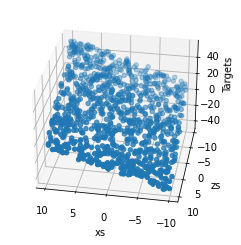

In [ ]:
targets = targets.reshape(observations)
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(xs,zs,targets)  #  use .scatter() instead of .plot() as seen in the video
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim = 100)
plt.show()
targets = targets.reshape(observations,1)             

In [ ]:
#Loading training data
training_data = np.load('TF_intro.npz')

In [ ]:
input_size = 2
output_size  = 1
# tf.keras.sequential funtions that specifies how the model will be laid down('stack layers')
model = tf.keras.Sequential([
                         # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
 ])
# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# model.compile(optimizer,loss) configures the model for training
model.compile(optimizer = custom_optimizer,loss = 'mean_squared_error') 

# model.fit(inputs,targets) fit(train) the model
#epochs = iteration over the full dataset
# verbose = '0', stands for 'silent' or no output about the training is displayed
# verbose  = '1', stands for 'progress bar'
# verbose = '2', stands for 'one line per epoch'
model.fit( training_data['inputs'], training_data['targets'],epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 27.9958
Epoch 2/100
32/32 - 0s - loss: 1.4445
Epoch 3/100
32/32 - 0s - loss: 0.4630
Epoch 4/100
32/32 - 0s - loss: 0.3877
Epoch 5/100
32/32 - 0s - loss: 0.4013
Epoch 6/100
32/32 - 0s - loss: 0.3845
Epoch 7/100
32/32 - 0s - loss: 0.3971
Epoch 8/100
32/32 - 0s - loss: 0.4264
Epoch 9/100
32/32 - 0s - loss: 0.3896
Epoch 10/100
32/32 - 0s - loss: 0.3870
Epoch 11/100
32/32 - 0s - loss: 0.3683
Epoch 12/100
32/32 - 0s - loss: 0.3829
Epoch 13/100
32/32 - 0s - loss: 0.3644
Epoch 14/100
32/32 - 0s - loss: 0.4000
Epoch 15/100
32/32 - 0s - loss: 0.3815
Epoch 16/100
32/32 - 0s - loss: 0.3671
Epoch 17/100
32/32 - 0s - loss: 0.3804
Epoch 18/100
32/32 - 0s - loss: 0.3960
Epoch 19/100
32/32 - 0s - loss: 0.4418
Epoch 20/100
32/32 - 0s - loss: 0.4036
Epoch 21/100
32/32 - 0s - loss: 0.3837
Epoch 22/100
32/32 - 0s - loss: 0.4755
Epoch 23/100
32/32 - 0s - loss: 0.3778
Epoch 24/100
32/32 - 0s - loss: 0.3725
Epoch 25/100
32/32 - 0s - loss: 0.4049
Epoch 26/100
32/32 - 0s - loss: 0

### Extract the weight and bias

In [ ]:
# model.layer.get_weights()  – This function returns a list consisting of NumPy arrays. The first array gives the weights
# of the layer and the second array gives the biases
model.layers[0].get_weights()

[array([[ 2.0542843],
        [-3.0250514]], dtype=float32),
 array([5.0307736], dtype=float32)]

In [ ]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0542843],
       [-3.0250514]], dtype=float32)

In [ ]:
# model.predict_on_batch(data) calculates the output given inputs
model.predict_on_batch(training_data['inputs']).round(1)

array([[-27.7],
       [ 29.8],
       [ 30.4],
       [ -4. ],
       [ 31.5],
       [-34.8],
       [-31.2],
       [ 35.2],
       [-25.9],
       [ 20.8],
       [-30.4],
       [ 37.8],
       [  6.7],
       [-21.4],
       [ 39. ],
       [ -0.2],
       [ 22.4],
       [ -1.7],
       [-36. ],
       [ 42.5],
       [ 28.6],
       [ 24.9],
       [  1.4],
       [ -6.1],
       [  3.4],
       [ 32.6],
       [ 19.4],
       [-21.2],
       [ 36.6],
       [ 19.7],
       [-21.5],
       [ -7.8],
       [ 41.8],
       [ 16.9],
       [-28.9],
       [ 27.1],
       [  4.6],
       [ 25.4],
       [  2.5],
       [  3.2],
       [ -6.2],
       [ 31.9],
       [  3.2],
       [ -1.8],
       [-30. ],
       [-16.9],
       [ 32.4],
       [ 10.2],
       [ 29.8],
       [ -1. ],
       [-15.3],
       [ -9.8],
       [ -6.8],
       [ 37.1],
       [  5.4],
       [ -6. ],
       [ 35.3],
       [ -1.2],
       [  0.1],
       [ 20. ],
       [ 23.3],
       [-12.6],
       [

In [ ]:
# model.predict_on_batch(data) calculates the output given inputs
training_data['inputs'].round(1)

array([[-2.5,  9.2],
       [ 1. , -7.5],
       [ 4.7, -5.2],
       ...,
       [ 9.1, -7.1],
       [ 7.7,  3.4],
       [ 7.8,  0.7]])

### Plotting the data

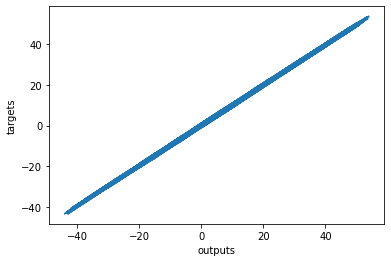

In [ ]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()